<a href="https://colab.research.google.com/github/renewable-energy-experiments/carbonfoorprint/blob/master/US_CarbonEmission_granular_powergen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center> US electricity generation by energy source ( price , co2 emission by grids)<center><h1> 
  High granularity Power generation CA ISO ( California) 

# Table of Contents
* [1. DataSet Description](#section-one)
* [2. Plot Generation graph](#section-two)
* [3. Plot Carbon Emission graph](#section-three)

In [3]:
import os
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.dates as mdates 
xformatter = mdates.DateFormatter('%H:%M') # for time axis plots

# import plotly.offline as py
# py.init_notebook_mode(connected=True)

import sklearn
from scipy.optimize import curve_fit

import warnings
warnings.filterwarnings('ignore')

<a id="section-one"></a>
# 1. DataSet Description

Dataset is weekly reports from EDA  for CA ISO

In [6]:
# Import generation  data 
df = pd.read_csv("/content/CA ISO_2020-09-07.csv")
df.head()

,Solar,NaturalGas,Hydro,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil,total_generation,Timestamp (Unix),total_generation(W)
0,6086.0,8045.0,1804.0,2272.0,13.0,0.0,2020-09-07 00:00:00,2020-09-07,00:00:00,0,0,0,0.0,0.0,18220.0,1599436800,1.822000e+10
1,6084.4,7960.4,1798.2,2272.0,12.8,0.0,2020-09-07 00:01:00,2020-09-07,00:01:00,0,1,1,0.0,0.0,18127.8,1599436860,1.812780e+10
2,6082.8,7875.8,1792.4,2272.0,12.6,0.0,2020-09-07 00:02:00,2020-09-07,00:02:00,0,2,2,0.0,0.0,18035.6,1599436920,1.803560e+10
3,6081.2,7791.2,1786.6,2272.0,12.4,0.0,2020-09-07 00:03:00,2020-09-07,00:03:00,0,3,3,0.0,0.0,17943.4,1599436980,1.794340e+10
4,6079.6,7706.6,1780.8,2272.0,12.2,0.0,2020-09-07 00:04:00,2020-09-07,00:04:00,0,4,4,0.0,0.0,17851.2,1599437040,1.785120e+10


In [7]:
df_carbon = pd.read_csv("/content/US Utility grids - LCOE, Co2 Emissions - Carbon3.csv")
df_carbon

,Fuel Type,Lifecycle emissions (gCO2eq/kWh),Lifecycle emissions (kgCO2eq/MWh)
0,Nuclear,12,12
1,Hydro,24,24
2,Wind,12,12
3,Solar,48,48
4,NaturalGas,490,490
5,Oil,490,490
6,Coal,820,820
7,Other,24,24


In [14]:
Region="CA ISO"

<a id="section-two"></a>
# 2. Plot Generation graph

In [76]:
column_list_gen = ("Wind","Solar","Hydro","Nuclear", "Other", 
                "NaturalGas","Oil","Coal","total_generation")

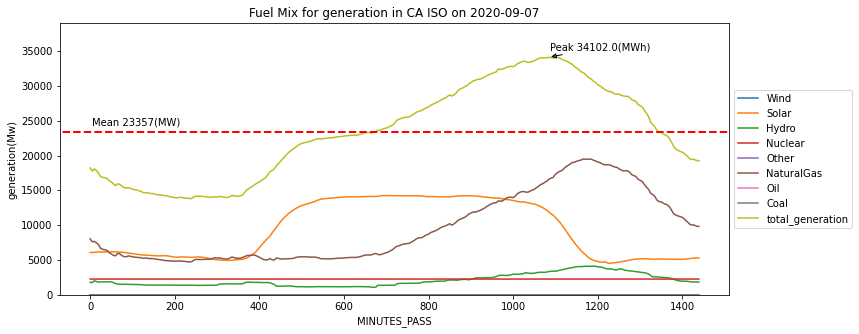

In [78]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

sub_df.plot.line(x='MINUTES_PASS', y = np.array(column_list_gen), ax = ax, title = "Fuel Mix for generation in "+ Region + " on "+ pp, legend=False)

ax.set_ylabel("generation(Mw)")

mean_gen = round(sub_df["total_generation"].mean())
max_gen = sub_df["total_generation"].max()
maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
maxh = maxh["MINUTES_PASS"]
ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)

ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MW)" )

#     ax.get_legend().remove()

ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
          arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)

ax.set_ylim(bottom = 0,top=39000)
    
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [10]:
for col in df.columns:
    # print(df[col])
    for j,carbon in df_carbon.iterrows():
        if col in carbon[0]:
            print("Match between two tables for "+col+ " and "+ carbon[0] +" - "+ str(carbon[1]))
            df['carbon_'+col] = df[col] * carbon[1]
            
df.head()

Match between two tables for Solar and Solar - 48
Match between two tables for NaturalGas and NaturalGas - 490
Match between two tables for Hydro and Hydro - 24
Match between two tables for Nuclear and Nuclear - 12
Match between two tables for Coal and Coal - 820
Match between two tables for Other and Other - 24
Match between two tables for Wind and Wind - 12
Match between two tables for Oil and Oil - 490


,Solar,NaturalGas,Hydro,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil,total_generation,Timestamp (Unix),total_generation(W),carbon_Solar,carbon_NaturalGas,carbon_Hydro,carbon_Nuclear,carbon_Coal,carbon_Other,carbon_Wind,carbon_Oil
0,6086.0,8045.0,1804.0,2272.0,13.0,0.0,2020-09-07 00:00:00,2020-09-07,00:00:00,0,0,0,0.0,0.0,18220.0,1599436800,1.822000e+10,292128.0,3942050.0,43296.0,27264.0,10660.0,0.0,0.0,0.0
1,6084.4,7960.4,1798.2,2272.0,12.8,0.0,2020-09-07 00:01:00,2020-09-07,00:01:00,0,1,1,0.0,0.0,18127.8,1599436860,1.812780e+10,292051.2,3900596.0,43156.8,27264.0,10496.0,0.0,0.0,0.0
2,6082.8,7875.8,1792.4,2272.0,12.6,0.0,2020-09-07 00:02:00,2020-09-07,00:02:00,0,2,2,0.0,0.0,18035.6,1599436920,1.803560e+10,291974.4,3859142.0,43017.6,27264.0,10332.0,0.0,0.0,0.0
3,6081.2,7791.2,1786.6,2272.0,12.4,0.0,2020-09-07 00:03:00,2020-09-07,00:03:00,0,3,3,0.0,0.0,17943.4,1599436980,1.794340e+10,291897.6,3817688.0,42878.4,27264.0,10168.0,0.0,0.0,0.0
4,6079.6,7706.6,1780.8,2272.0,12.2,0.0,2020-09-07 00:04:00,2020-09-07,00:04:00,0,4,4,0.0,0.0,17851.2,1599437040,1.785120e+10,291820.8,3776234.0,42739.2,27264.0,10004.0,0.0,0.0,0.0


In [40]:
df['carbon_total_emission']= df["carbon_Wind"] + df["carbon_Solar"]+ df["carbon_Hydro"] + df["carbon_Other"]+ df["carbon_Oil"] + df["carbon_NaturalGas"] + df["carbon_Coal"]+ df["carbon_Nuclear"]
df.head()

,Solar,NaturalGas,Hydro,Nuclear,Coal,Other,Timestamp,DATE,TIME,HOURS,MINUTES,MINUTES_PASS,Wind,Oil,total_generation,Timestamp (Unix),total_generation(W),carbon_Solar,carbon_NaturalGas,carbon_Hydro,carbon_Nuclear,carbon_Coal,carbon_Other,carbon_Wind,carbon_Oil,carbon_total_emission
0,6086.0,8045.0,1804.0,2272.0,13.0,0.0,2020-09-07 00:00:00,2020-09-07,00:00:00,0,0,0,0.0,0.0,18220.0,1599436800,1.822000e+10,292128.0,3942050.0,43296.0,27264.0,10660.0,0.0,0.0,0.0,4315398.0
1,6084.4,7960.4,1798.2,2272.0,12.8,0.0,2020-09-07 00:01:00,2020-09-07,00:01:00,0,1,1,0.0,0.0,18127.8,1599436860,1.812780e+10,292051.2,3900596.0,43156.8,27264.0,10496.0,0.0,0.0,0.0,4273564.0
2,6082.8,7875.8,1792.4,2272.0,12.6,0.0,2020-09-07 00:02:00,2020-09-07,00:02:00,0,2,2,0.0,0.0,18035.6,1599436920,1.803560e+10,291974.4,3859142.0,43017.6,27264.0,10332.0,0.0,0.0,0.0,4231730.0
3,6081.2,7791.2,1786.6,2272.0,12.4,0.0,2020-09-07 00:03:00,2020-09-07,00:03:00,0,3,3,0.0,0.0,17943.4,1599436980,1.794340e+10,291897.6,3817688.0,42878.4,27264.0,10168.0,0.0,0.0,0.0,4189896.0
4,6079.6,7706.6,1780.8,2272.0,12.2,0.0,2020-09-07 00:04:00,2020-09-07,00:04:00,0,4,4,0.0,0.0,17851.2,1599437040,1.785120e+10,291820.8,3776234.0,42739.2,27264.0,10004.0,0.0,0.0,0.0,4148062.0


<a id="section-three"></a>
# 3. Plot Carbon graphs

In [80]:
column_list = ("carbon_Wind","carbon_Solar","carbon_Hydro","carbon_Nuclear", "carbon_Other", 
                "carbon_NaturalGas","carbon_Oil","carbon_Coal","carbon_total_emission")

In [12]:
dates = df['DATE'].unique()
dates

array(['2020-09-07'], dtype=object)

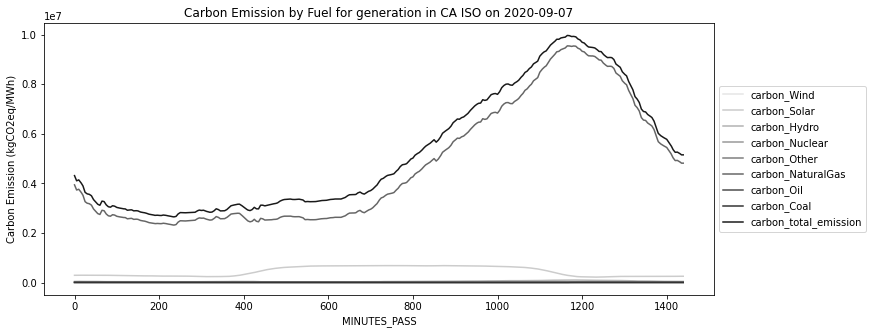

In [65]:
import seaborn as sns
cmap = sns.color_palette("gray_r", n_colors=9)

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df.plot(x='MINUTES_PASS', y = np.array(column_list), ax = ax, 
             color=cmap, 
              # kind='area', stacked=False,
              title = "Carbon Emission by Fuel for generation in "+ Region + " on "+ pp,legend=False)
ax.set_ylabel("Carbon Emission (kgCO2eq/MWh)")   
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

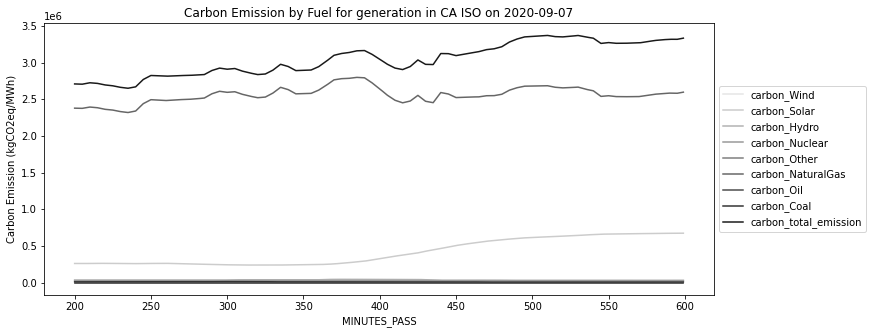

In [70]:
import seaborn as sns
cmap = sns.color_palette("gray_r", n_colors=9)

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df[200:600].plot(x='MINUTES_PASS', y = np.array(column_list), ax = ax, 
             color=cmap, 
              # kind='area', stacked=False,
              title = "Carbon Emission by Fuel for generation in "+ Region + " on "+ pp,legend=False)
ax.set_ylabel("Carbon Emission (kgCO2eq/MWh)")   
# ax.set_ylim(bottom = 0,top=50000)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

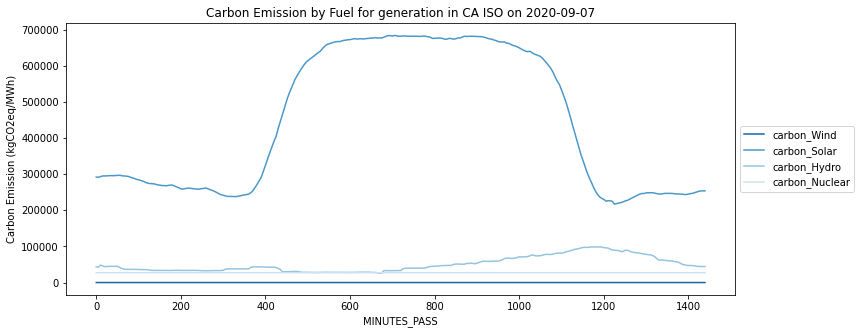

In [89]:
import seaborn as sns
cmap = sns.color_palette("Blues_r", n_colors=4)

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df.plot(x='MINUTES_PASS', y = np.array(column_list)[0:4], ax = ax, 
             color=cmap, 
              # kind='area', stacked=False,
              title = "Carbon Emission by Fuel for generation in "+ Region + " on "+ pp,legend=False)
ax.set_ylabel("Carbon Emission (kgCO2eq/MWh)")   
# ax.set_ylim(bottom = 0,top=50000)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

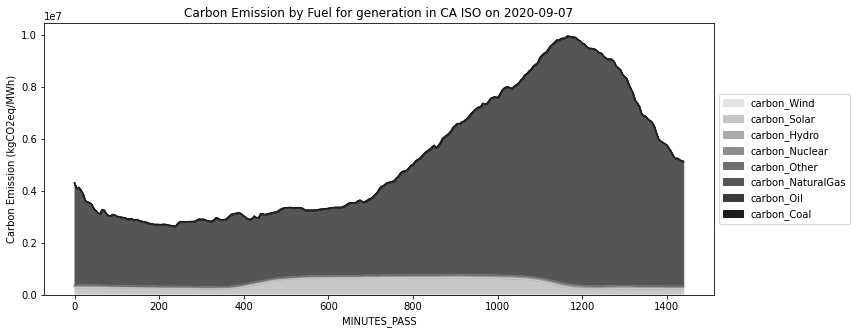

In [92]:
## Without total carbon emission 
import seaborn as sns
cmap = sns.color_palette("gray_r", n_colors=8)

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df.plot(x='MINUTES_PASS', y = np.array(column_list)[0:8], ax = ax, 
             color=cmap, 
              kind='area', stacked=True,
              title = "Carbon Emission by Fuel for generation in "+ Region + " on "+ pp,legend=False)
ax.set_ylabel("Carbon Emission (kgCO2eq/MWh)")
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

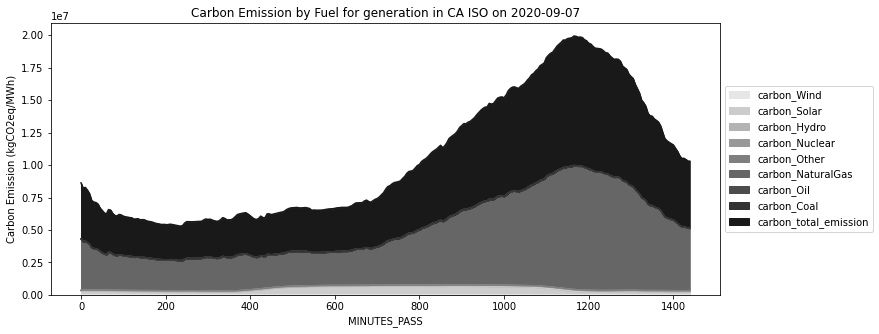

In [93]:
## With total carbon emission 
import seaborn as sns
cmap = sns.color_palette("gray_r", n_colors=9)

fig, ax = plt.subplots()
fig.set_size_inches(12, 5)
df.plot(x='MINUTES_PASS', y = np.array(column_list), ax = ax, 
             color=cmap, 
          kind='area', stacked=True,
              title = "Carbon Emission by Fuel for generation in "+ Region + " on "+ pp,legend=False)
ax.set_ylabel("Carbon Emission (kgCO2eq/MWh)")

# mean_gen = round(sub_df["total_generation"].mean())
# max_gen = sub_df["total_generation"].max()
# maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
# maxh = maxh["HOURS"]

# Mark Mean Line 
# ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
# ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MW)" )

# ax.get_legend().remove()

# Mark Peak consumption 
# ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
#              arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plot.show(block=True);

2020-09-07


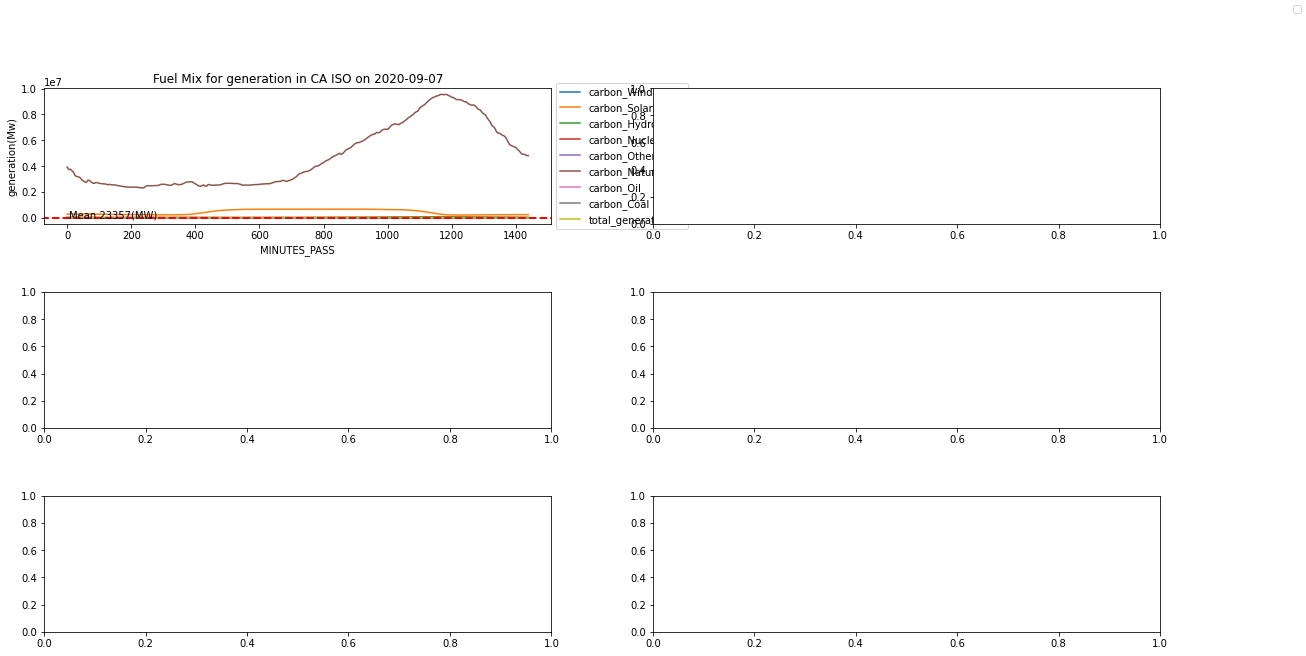

In [64]:
# fig, axs = plt.subplots(nrows=3, ncols=2)
# fig.set_size_inches(20, 10)
# fig.subplots_adjust(wspace=0.2)
# fig.subplots_adjust(hspace=0.5)

# fig.legend(column_list)
  
# for pp,ax in zip(dates,axs.flatten()):
#     print(pp)
#     sub_df = df[df['DATE']==pp]
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[0], ax = ax, title = "Fuel Mix for generation in "+ Region + " on "+ pp,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[1], ax = ax,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[2], ax = ax,legend=False)    
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[3], ax = ax,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[4], ax = ax,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[5], ax = ax,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[6], ax = ax,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y = column_list[7], ax = ax,legend=False)
#     sub_df.plot.line(x='MINUTES_PASS', y =['total_generation'], ax = ax,legend=False)
    
#     ax.set_ylabel("generation(Mw)")
    
#     mean_gen = round(sub_df["total_generation"].mean())
#     max_gen = sub_df["total_generation"].max()
#     maxh = sub_df.loc[sub_df["total_generation"]== max_gen]
#     maxh = maxh["MINUTES_PASS"]
#     ax.axhline(y=mean_gen, xmin=-1, xmax=1, color='r', linestyle='--', lw=2)
    
#     ax.text(5,mean_gen+1000, "Mean " + str(mean_gen) + "(MW)" )

# #     ax.get_legend().remove()
    
# #     ax.annotate('Peak '+ str(max_gen)+ "(MWh)", xy=(maxh,max_gen), xytext=(maxh+1, max_gen+1000),
# #              arrowprops=dict(arrowstyle='-|>') ,ha='left', rotation=0)
    
#     ax.set_ylim(bottom = 0,top=39000)
    
# ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))